<a href="https://colab.research.google.com/github/RoseDanjuma/sde_simulator/blob/main/sde_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Streamlit

In [1]:
pip install numpy matplotlib streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.9 MB/s eta 0:00:00


An Interactive App

2025-11-04 13:15:46.812 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 13:15:47.011 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-04 13:15:47.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 13:15:47.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 13:15:47.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 13:15:47.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 13:15:47.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 13:15:47.024 Thread 'MainThread': mi

DeltaGenerator()

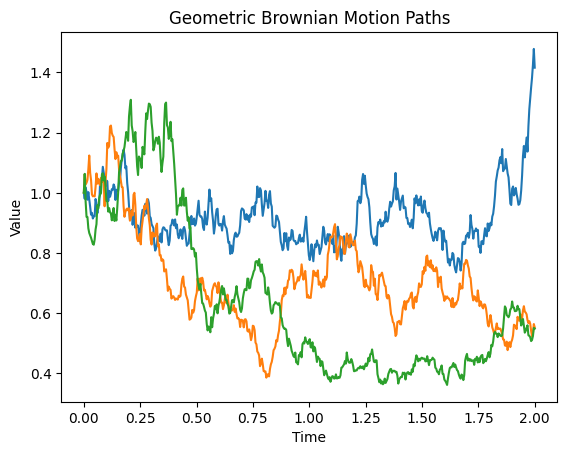

In [3]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

st.title("Stochastic Differential Equation Simulator")
st.markdown("Simulating Geometric Brownian Motion (GBM)")

# User inputs
mu = st.slider("Drift (μ)", -1.0, 1.0, 0.1)
sigma = st.slider("Volatility (σ)", 0.1, 2.0, 0.5)
T = st.slider("Time Horizon (T)", 1.0, 5.0, 2.0)
N = st.slider("Number of Steps (N)", 100, 1000, 500)
M = st.slider("Number of Paths (M)", 1, 10, 3)

# Simulation
dt = T / N
t = np.linspace(0, T, N)
paths = np.zeros((M, N))
paths[:, 0] = 1 # Initial value

for i in range(1, N):
    Z = np.random.normal(0, 1, M)
    paths[:, i] = paths[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Plotting
fig, ax = plt.subplots()
for i in range(M):
    ax.plot(t, paths[i])
ax.set_title("Geometric Brownian Motion Paths")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
st.pyplot(fig)